# **Estadisticas y Transformacion de los Datos**

En el siguiente dataset hemos utilizado las Mag >= 5.5

## **Top 10**

Hemos filtrado el Top 10 de las `Mag`

In [12]:
import pandas as pd
from tabulate import tabulate

# Cargar el DataFrame desde un archivo CSV
df = pd.read_csv('./data/data.csv')

# Encontrar los 10 terremotos más fuertes
top_10 = df.nlargest(10, 'Mag')

# Crear la columna con el rango de magnitudes
top_10['Rango'] = pd.cut(top_10['Mag'], bins=[0, 7, 8, 9, 10], labels=['<7', '7-8', '8-9', '9-10'])

# Seleccionar las columnas a mostrar
cols = ['Rango', 'Mag', 'Depth', 'Country', 'Date']

# Convertir los datos en una lista de listas
tabla = top_10[cols].values.tolist()

# Crear una cadena de texto con la tabla
tabla_str = tabulate(tabla, headers=cols, tablefmt='grid')

# Mostrar la tabla
print(tabla_str)

+---------+-------+---------+--------------+------------+
| Rango   |   Mag |   Depth | Country      | Date       |
+=========+=======+=========+==============+============+
| 9-10    |   9.5 |      25 | Chile        | 1960-05-22 |
+---------+-------+---------+--------------+------------+
| 9-10    |   9.2 |      25 | Alaska       | 1964-03-28 |
+---------+-------+---------+--------------+------------+
| 9-10    |   9.1 |      30 | Indian Ocean | 2004-12-26 |
+---------+-------+---------+--------------+------------+
| 9-10    |   9.1 |      29 | Japan        | 2011-03-11 |
+---------+-------+---------+--------------+------------+
| 8-9     |   9   |      21 | Russia       | 1952-11-04 |
+---------+-------+---------+--------------+------------+
| 8-9     |   8.8 |      20 | Ecuador      | 1906-01-31 |
+---------+-------+---------+--------------+------------+
| 8-9     |   8.8 |      22 | Chile        | 2010-02-27 |
+---------+-------+---------+--------------+------------+
| 8-9     |   

**Algunas conclusiones clave son:**

La tabla muestra los 10 terremotos más fuertes de acuerdo a la magnitud en el DataFrame. Se han creado rangos de magnitudes utilizando la función `pd.cut()`, dividiendo las magnitudes en intervalos de 7 a 8, de 8 a 9, y de 9 a 10. La tabla muestra la columna `"Rango"` que indica el rango de magnitudes al que pertenece cada terremoto, la columna `"Mag"` que muestra la magnitud exacta del terremoto, la columna `"Depth"` que indica la profundidad del terremoto, la columna `"Country"` que muestra el país donde ocurrió el terremoto, y la columna `"Date"` que indica la fecha en la que ocurrió.

Esta tabla nos proporciona una visión rápida de los terremotos más fuertes, permitiendo identificar los rangos de magnitudes, la magnitud exacta, la profundidad, el país y la fecha de cada terremoto.

## **Top 10 del Peru**

In [4]:
import pandas as pd
from tabulate import tabulate

# Cargar el DataFrame desde un archivo CSV
df = pd.read_csv('./data/data.csv')

# Filtrar terremotos relacionados con el país Perú
df_peru = df[df['Country'] == 'Peru']

# Encontrar los 10 terremotos más fuertes en Perú
top_10_peru = df_peru.nlargest(10, 'Mag')

# Crear la columna con el rango de magnitudes
top_10_peru['Rango'] = pd.cut(top_10_peru['Mag'], bins=[0, 7, 8, 9, 10], labels=['<7', '7-8', '8-9', '9-10'])

# Seleccionar las columnas a mostrar
cols = ['Rango', 'Mag', 'Depth', 'Place', 'Date']

# Convertir los datos en una lista de listas
tabla = top_10_peru[cols].values.tolist()

# Crear una cadena de texto con la tabla
tabla_str = tabulate(tabla, headers=cols, tablefmt='grid')

# Mostrar la tabla
print(tabla_str)

+---------+-------+---------+-----------------------------------------------+------------+
| Rango   |   Mag |   Depth | Place                                         | Date       |
+=========+=======+=========+===============================================+============+
| 8-9     |  8.4  |      33 | 6 km ssw of atico, peru.                      | 2001-06-23 |
+---------+-------+---------+-----------------------------------------------+------------+
| 8-9     |  8.2  |      45 | 21 km se of huacho, peru.                     | 1940-05-24 |
+---------+-------+---------+-----------------------------------------------+------------+
| 8-9     |  8.1  |      30 | 21 km nne of minas de marcona, peru.          | 1942-08-24 |
+---------+-------+---------+-----------------------------------------------+------------+
| 8-9     |  8.1  |      40 | 43 km w of paramonga, peru.                   | 1966-10-17 |
+---------+-------+---------+-----------------------------------------------+------------+

## **Graficos**

### **Gráfico de dispersión de profundidad y magnitud**

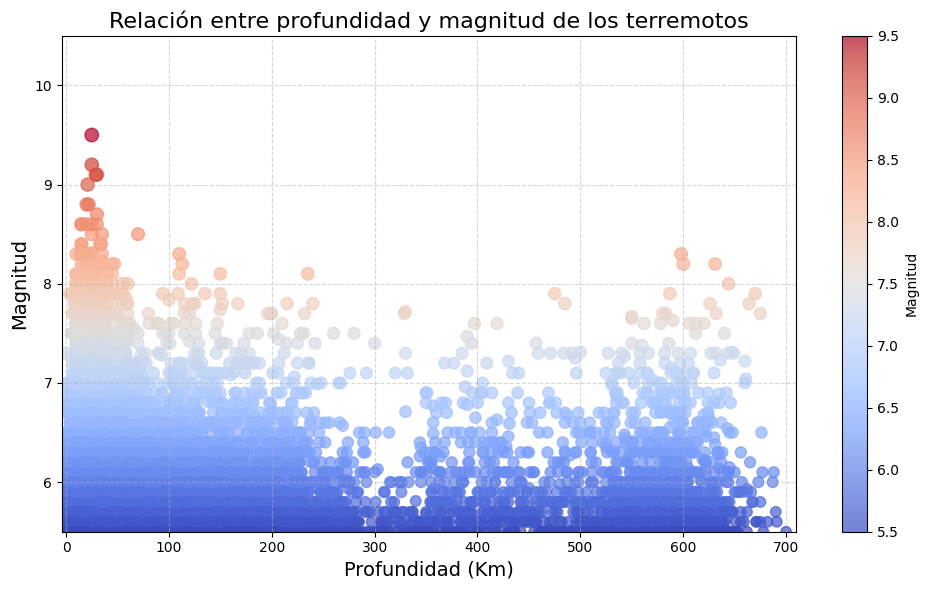

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el DataFrame desde un archivo CSV
df = pd.read_csv('./data/data.csv')

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura
plt.scatter(df['Depth'], df['Mag'], s=df['Mag']*10, c=df['Mag'], cmap='coolwarm', alpha=0.7)  # Personaliza el tamaño y el color

# Agregar una barra de colores
plt.colorbar(label='Magnitud')  # Personaliza la etiqueta de la barra de colores

# Agregar título y etiquetas de los ejes
plt.title('Relación entre profundidad y magnitud de los terremotos', fontsize=16)  # Personaliza el título y el tamaño de fuente
plt.xlabel('Profundidad (Km)', fontsize=14)  # Personaliza la etiqueta del eje x y el tamaño de fuente
plt.ylabel('Magnitud', fontsize=14)  # Personaliza la etiqueta del eje y y el tamaño de fuente

# Personalizar la cuadrícula de fondo
plt.grid(True, linestyle='--', alpha=0.5)

# Personalizar los ejes (ajustar el rango y escala)
plt.xlim(-4, df['Depth'].max() + 10)  # Ajusta el rango del eje x
plt.ylim(5.5, df['Mag'].max() + 1)  # Ajusta el rango del eje y

# Personalizar el aspecto general
plt.tight_layout()  # Ajusta el espaciado entre los elementos del gráfico

# Mostrar el gráfico
plt.show()

**Algunas conclusiones clave son:**

La gráfica de dispersión muestra la relación entre la profundidad y la magnitud de los terremotos. Cada punto en el gráfico representa un terremoto, donde el eje `x` representa la profundidad y el eje `y` representa la magnitud.

Al observar el gráfico, podemos identificar ciertas tendencias o patrones. En general, parece haber una distribución de terremotos con magnitudes más altas en un rango de profundidades variadas. Sin embargo, no hay una correlación clara entre la profundidad y la magnitud de los terremotos, ya que encontramos terremotos de alta magnitud en diferentes profundidades.

Además, el tamaño de los puntos en el gráfico está relacionado con la magnitud de los terremotos, donde los puntos más grandes representan terremotos de mayor magnitud.

En resumen, esta gráfica de dispersión nos permite visualizar la distribución de terremotos en función de su profundidad y magnitud, y nos ayuda a tener una idea general de cómo estas dos variables pueden estar relacionadas.

### **Gráfico de dispersión de profundidad y magnitud del Peru**

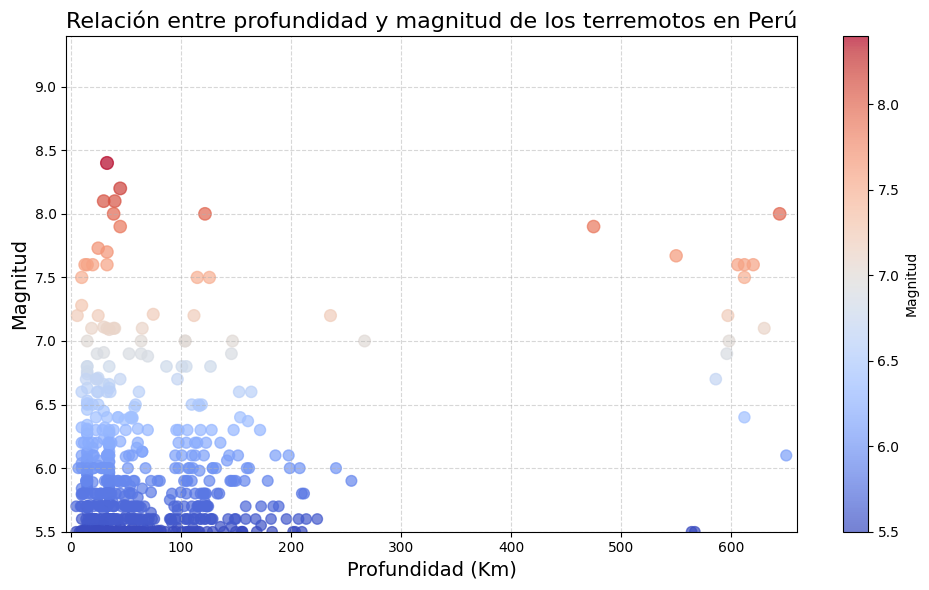

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el DataFrame desde un archivo CSV
df = pd.read_csv('./data/data.csv')

# Filtrar los terremotos relacionados con el país "Peru"
df_peru = df[df['Country'] == 'Peru']

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
plt.scatter(df_peru['Depth'], df_peru['Mag'], s=df_peru['Mag']*10, c=df_peru['Mag'], cmap='coolwarm', alpha=0.7)

# Agregar una barra de colores
plt.colorbar(label='Magnitud')

# Agregar título y etiquetas de los ejes
plt.title('Relación entre profundidad y magnitud de los terremotos en Perú', fontsize=16)
plt.xlabel('Profundidad (Km)', fontsize=14)
plt.ylabel('Magnitud', fontsize=14)

# Personalizar el aspecto general
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(-4, df_peru['Depth'].max() + 10)
plt.ylim(5.5, df_peru['Mag'].max() + 1)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### **Histograma de magnitudes**

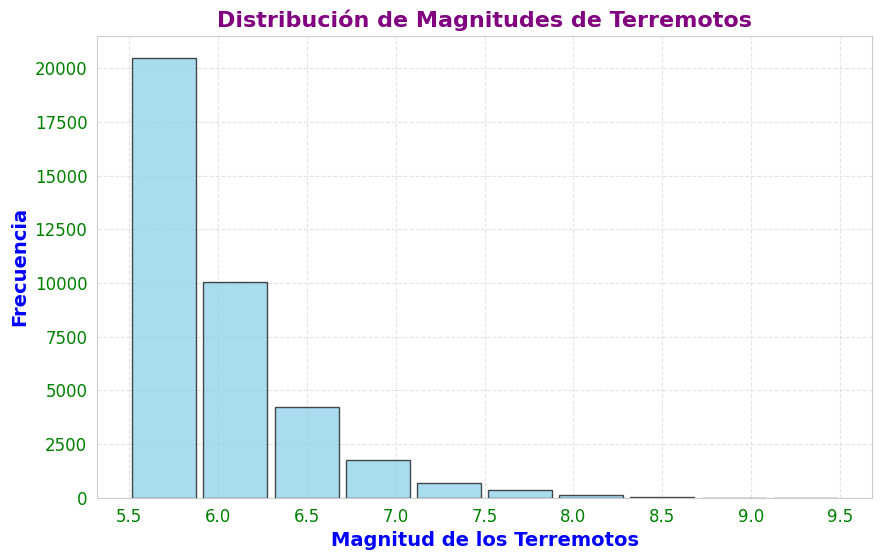

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set_style('whitegrid')
sns.set_palette('viridis')

# Lectura del archivo de datos
df = pd.read_csv('./data/data.csv')
magnitudes = df['Mag']

bin_size = 10

# Personalización del histograma
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
plt.hist(magnitudes, bins=bin_size, edgecolor='black', color='skyblue', alpha=0.7, rwidth=0.9)  # Añadir rwidth para ajustar el ancho de las barras

plt.xlabel('Magnitud de los Terremotos', fontsize=14, fontweight='bold', color='blue')  # Aumentar el tamaño y hacerlo más destacado
plt.ylabel('Frecuencia', fontsize=14, fontweight='bold', color='blue')  # Aumentar el tamaño y hacerlo más destacado
plt.title('Distribución de Magnitudes de Terremotos', fontsize=16, fontweight='bold', color='purple')  # Aumentar el tamaño y hacerlo más destacado

# Añadir una cuadrícula de fondo
plt.grid(True, linestyle='--', alpha=0.5)

# Cambiar el tamaño y color de las etiquetas del eje x e y
plt.xticks(fontsize=12, color='green')  # Personalización del tamaño y color de las etiquetas del eje x
plt.yticks(fontsize=12, color='green')  # Personalización del tamaño y color de las etiquetas del eje y

# Mostrar el gráfico
plt.show()

**Algunas conclusiones clave son:**

* La mayoría de los terremotos registrados tienen magnitudes bajas a moderadas, lo que indica que los eventos sísmicos más fuertes son menos comunes.
* La frecuencia de terremotos disminuye a medida que las magnitudes aumentan, lo que sugiere que los terremotos de mayor magnitud son menos frecuentes.
* La forma de la distribución es asimétrica, con una cola larga hacia la derecha. Esto indica que los terremotos más pequeños son más comunes que los terremotos de mayor magnitud.
* La gráfica proporciona una visualización efectiva de la distribución de magnitudes de terremotos y ayuda a comprender la ocurrencia relativa de diferentes magnitudes.
*En general, la distribución de magnitudes de terremotos muestra que la mayoría de los eventos son de baja a moderada magnitud, con una ocurrencia menos frecuente de terremotos de mayor intensidad.

### **Histograma de magnitudes del Peru**

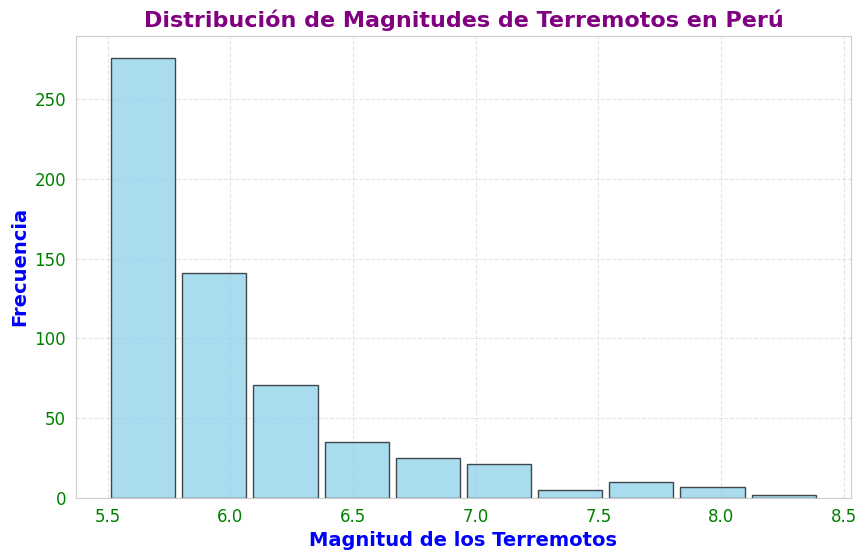

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set_style('whitegrid')
sns.set_palette('viridis')

# Lectura del archivo de datos
df = pd.read_csv('./data/data.csv')

# Filtrar terremotos en Perú
df_peru = df[df['Country'] == 'Peru']
magnitudes_peru = df_peru['Mag']

# Personalización del histograma
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
plt.hist(magnitudes_peru, bins=10, edgecolor='black', color='skyblue', alpha=0.7, rwidth=0.9)  # Añadir rwidth para ajustar el ancho de las barras

plt.xlabel('Magnitud de los Terremotos', fontsize=14, fontweight='bold', color='blue')  # Aumentar el tamaño y hacerlo más destacado
plt.ylabel('Frecuencia', fontsize=14, fontweight='bold', color='blue')  # Aumentar el tamaño y hacerlo más destacado
plt.title('Distribución de Magnitudes de Terremotos en Perú', fontsize=16, fontweight='bold', color='purple')  # Aumentar el tamaño y hacerlo más destacado

# Añadir una cuadrícula de fondo
plt.grid(True, linestyle='--', alpha=0.5)

# Cambiar el tamaño y color de las etiquetas del eje x e y
plt.xticks(fontsize=12, color='green')  # Personalización del tamaño y color de las etiquetas del eje x
plt.yticks(fontsize=12, color='green')  # Personalización del tamaño y color de las etiquetas del eje y

# Mostrar el gráfico
plt.show()

### **Gráfico de barras**

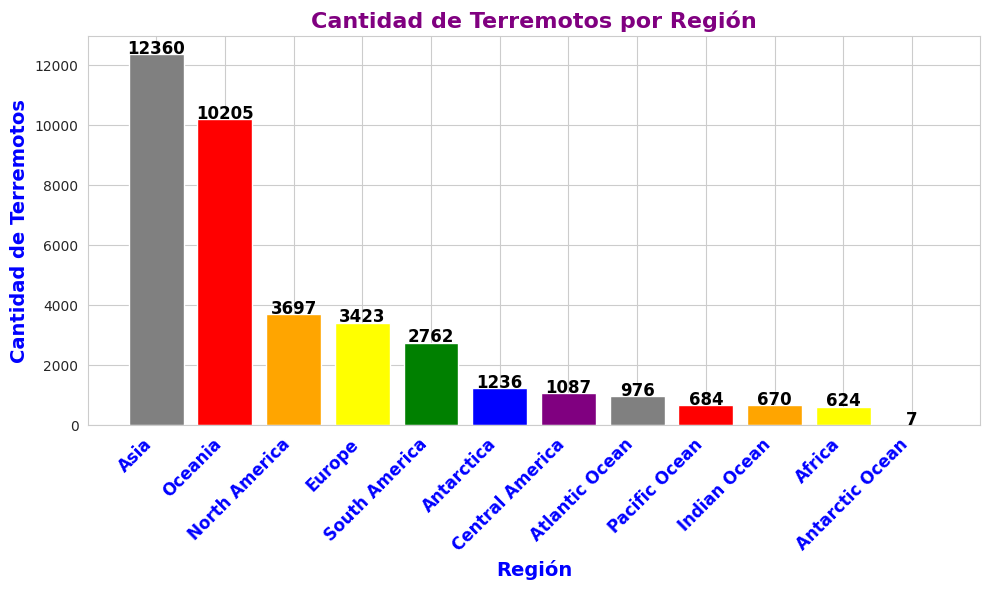

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./data/data.csv')

# Agrupar por continente
data['Region'] = data['Continent']
count_by_region = data['Region'].value_counts()

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))  # Ajustar el tamaño de la figura

# Colores personalizados
colors = ['gray', 'red', 'orange', 'yellow', 'green', 'blue', 'purple']

# Crear el gráfico de barras con colores personalizados
ax.bar(count_by_region.index, count_by_region.values, color=colors)

# Agregar etiquetas de datos en la parte superior de cada barra
for i, val in enumerate(count_by_region.values):
    ax.text(i, val + 10, str(val), ha='center', fontsize=12, fontweight='bold', color='black')  # Personalizar la etiqueta de datos

# Configurar las etiquetas del eje x y el espaciado entre barras
ax.set_xticks(range(len(count_by_region)))
ax.set_xticklabels(count_by_region.index, rotation=45, ha='right', fontsize=12, fontweight='bold', color='blue')  # Personalizar las etiquetas del eje x

# Configurar el título y las etiquetas de los ejes con tamaño de fuente personalizado
ax.set_title('Cantidad de Terremotos por Región', fontsize=16, fontweight='bold', color='purple')  # Personalizar el título
ax.set_xlabel('Región', fontsize=14, fontweight='bold', color='blue')  # Personalizar la etiqueta del eje x
ax.set_ylabel('Cantidad de Terremotos', fontsize=14, fontweight='bold', color='blue')  # Personalizar la etiqueta del eje y

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el espaciado
plt.show()

**Algunas conclusiones clave son:**

La gráfica muestra la cantidad de terremotos registrados por región. Se observa que Asia tiene la mayor cantidad de terremotos, seguida de América del Norte y América del Sur. Europa, África, Oceanía y la Antártida tienen una menor cantidad de terremotos en comparación. La gráfica resalta la disparidad en la distribución de terremotos en diferentes regiones del mundo.

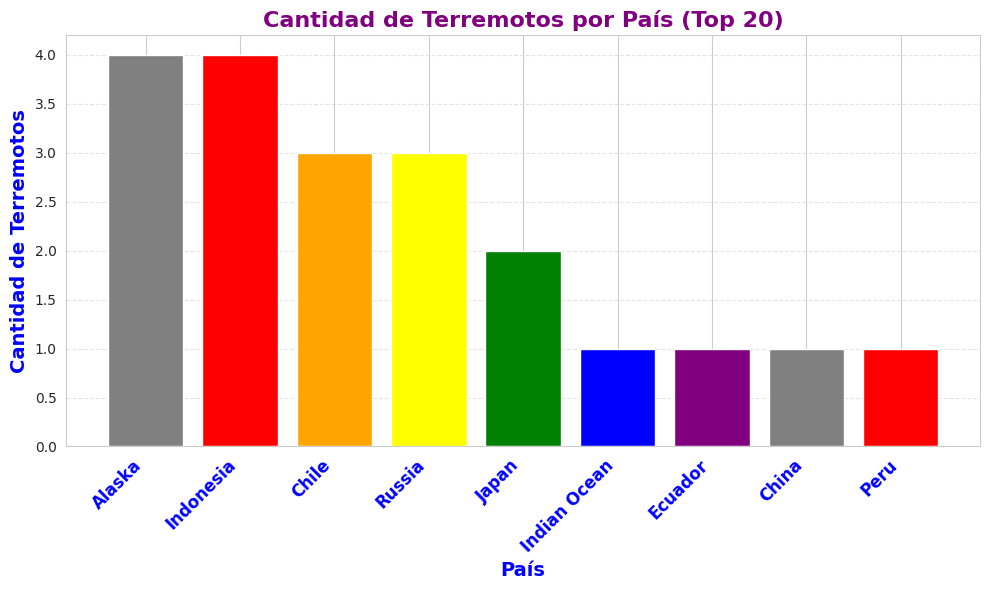

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/data.csv')

# Obtener el top 20 de los terremotos más fuertes por país
top_20 = df.nlargest(20, 'Mag')

# Agrupar por país
top_20['Region'] = top_20['Country']
count_by_region = top_20['Region'].value_counts()

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))  # Ajustar el tamaño de la figura

# Colores personalizados
colors = ['gray', 'red', 'orange', 'yellow', 'green', 'blue', 'purple']

# Crear el gráfico de barras con colores personalizados
ax.bar(count_by_region.index, count_by_region.values, color=colors)

# Configurar las etiquetas del eje x y el espaciado entre barras
ax.set_xticks(range(len(count_by_region)))
ax.set_xticklabels(count_by_region.index, rotation=45, ha='right', fontsize=12, fontweight='bold', color='blue')  # Personalizar las etiquetas del eje x

# Configurar el título y las etiquetas de los ejes con tamaño de fuente personalizado
ax.set_title('Cantidad de Terremotos por País (Top 20)', fontsize=16, fontweight='bold', color='purple')  # Personalizar el título
ax.set_xlabel('País', fontsize=14, fontweight='bold', color='blue')  # Personalizar la etiqueta del eje x
ax.set_ylabel('Cantidad de Terremotos', fontsize=14, fontweight='bold', color='blue')  # Personalizar la etiqueta del eje y

# Añadir una cuadrícula de fondo
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el espaciado
plt.show()

**Algunas conclusiones clave son:**

La gráfica muestra la cantidad de los 20 terremotos más fuertes registrados en cada país. Cada barra representa un país, y la altura de la barra indica la cantidad de terremotos registrados. La gráfica proporciona una visualización rápida de los países con mayor actividad sísmica en términos de terremotos más fuertes. Puedes observar la distribución y comparar la cantidad de terremotos entre diferentes países.

### **Gráfico de serie temporal**

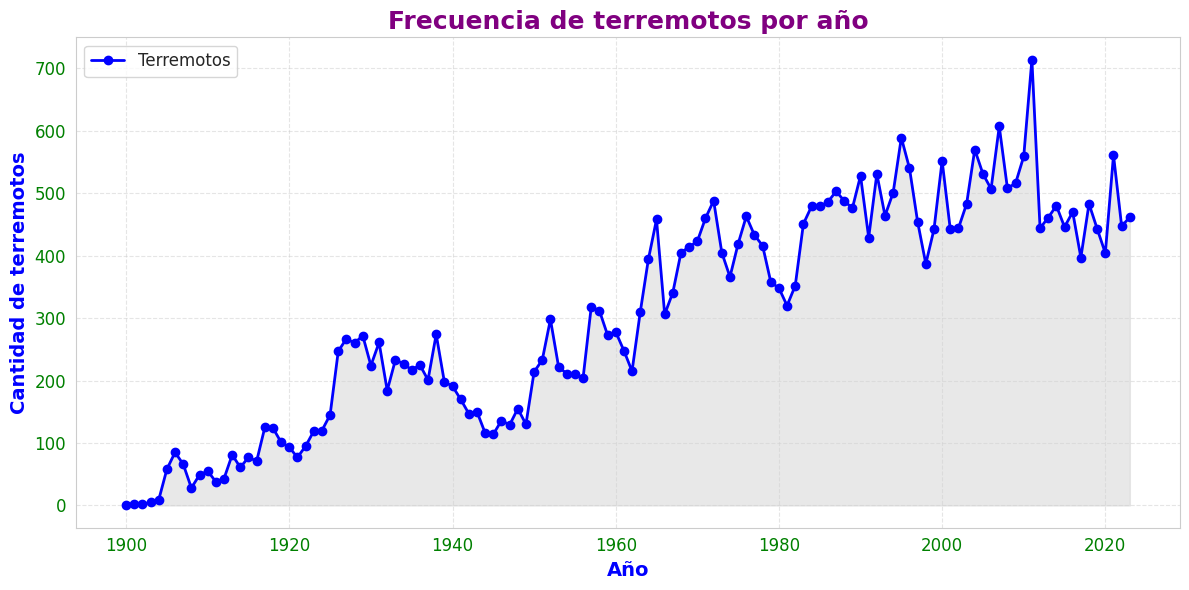

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el DataFrame desde un archivo CSV
df = pd.read_csv('./data/data.csv')

# Convertir la columna de fechas en formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Agrupar por año y contar la cantidad de terremotos por año
terremotos_por_año = df.groupby(df['Date'].dt.year)['ID'].count()

# Crear el gráfico de serie temporal
plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura

# Personalizar el estilo de la línea y el color
plt.plot(terremotos_por_año.index, terremotos_por_año.values, color='blue', linewidth=2, marker='o', markersize=6, label='Terremotos')

# Personalizar el gráfico
plt.title('Frecuencia de terremotos por año', fontsize=18, fontweight='bold', color='purple')  # Personalizar el título del gráfico
plt.xlabel('Año', fontsize=14, fontweight='bold', color='blue')  # Personalizar el título del eje X
plt.ylabel('Cantidad de terremotos', fontsize=14, fontweight='bold', color='blue')  # Personalizar el título del eje Y
plt.xticks(fontsize=12, color='green')  # Personalizar el tamaño y color de las etiquetas del eje X
plt.yticks(fontsize=12, color='green')  # Personalizar el tamaño y color de las etiquetas del eje Y
plt.legend(loc='upper left', fontsize=12)  # Personalizar la posición y tamaño de la leyenda
plt.grid(True, linestyle='--', alpha=0.5)  # Personalizar la cuadrícula

# Añadir un fondo de color al gráfico
plt.fill_between(terremotos_por_año.index, terremotos_por_año.values, color='lightgray', alpha=0.5)

plt.tight_layout()  # Ajustar el espaciado
plt.show()  # Mostrar el gráfico

**Algunas conclusiones que se pueden obtener de esta gráfica son:**

* Existe una variabilidad en la frecuencia de terremotos a lo largo del tiempo. Algunos años presentan un mayor número de terremotos, mientras que otros años tienen una menor cantidad.

* Hay años en los que se registra una cantidad significativa de terremotos, lo cual puede indicar períodos de mayor actividad sísmica.

* Es importante seguir monitoreando y estudiando la actividad sísmica para comprender mejor los patrones y factores que influyen en la ocurrencia de terremotos.

En resumen, la gráfica proporciona una representación visual de la frecuencia de terremotos por año y resalta la variabilidad en la ocurrencia de estos eventos a lo largo del tiempo.

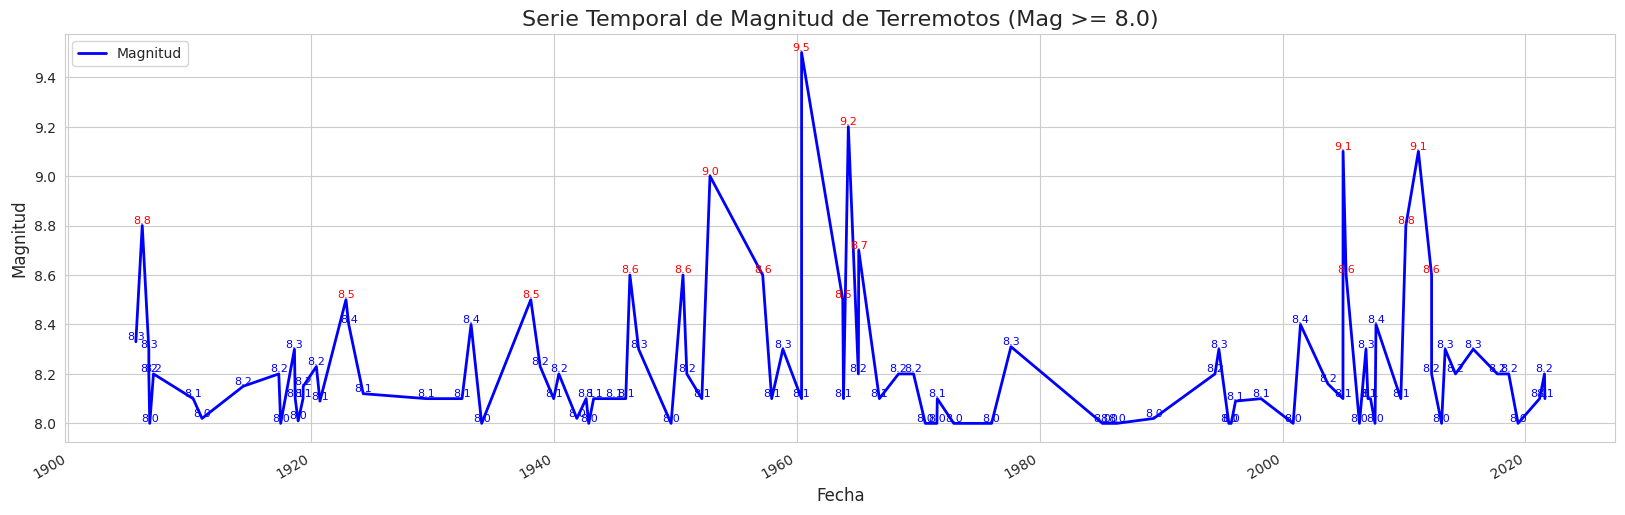

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = pd.read_csv('./data/data.csv')

# Convertir la columna 'Date' a formato de fecha
df['Date'] = pd.to_datetime(df['Date'])

# Filtrar los terremotos con magnitud >= 8.0
df = df[df['Mag'] >= 8.0]

# Ordenar el DataFrame por la columna 'Date' en orden ascendente
df = df.sort_values('Date')

# Crear el gráfico de serie temporal
fig, ax = plt.subplots(figsize=(20, 6))

# Personalizar el diseño y las descripciones
plt.plot(df['Date'], df['Mag'], color='blue', linewidth=2, label='Magnitud')
plt.title('Serie Temporal de Magnitud de Terremotos (Mag >= 8.0)', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Magnitud', fontsize=12)
plt.grid(True)

# Añadir descripciones de los valores
for index, row in df.iterrows():
    if row['Mag'] >= 8.5:
        ax.text(row['Date'], row['Mag'], f'{row["Mag"]:.1f}', ha='center', va='bottom', color='red', fontsize=8)
    else:
        ax.text(row['Date'], row['Mag'], f'{row["Mag"]:.1f}', ha='center', va='bottom', color='blue', fontsize=8)

# Configurar el formateador de fechas en el eje x para mostrar solo el año
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Ajustar los márgenes y el espaciado entre los ticks del eje x
fig.autofmt_xdate()

# Mostrar la leyenda
ax.legend(loc='upper left')

# Mostrar el gráfico
plt.show()


**Algunas conclusiones clave son:**

* La gráfica de serie temporal muestra la magnitud de los terremotos con valores igual o superiores a 8.0 en función de la fecha. Se ha utilizado un filtro para seleccionar únicamente los terremotos que cumplen con este criterio, y los datos se han ordenado en orden ascendente por fecha.

* En la gráfica, se puede observar la evolución de la magnitud de los terremotos a lo largo del tiempo. Cada punto representa un terremoto y su posición en el eje x corresponde a la fecha en que ocurrió, mientras que su posición en el eje y representa la magnitud del terremoto.

* Se han agregado etiquetas con los valores de magnitud en cada punto, resaltando en rojo aquellos terremotos con magnitudes superiores o iguales a 8.5.

* La gráfica muestra la tendencia de los terremotos de alta magnitud a lo largo del tiempo, permitiendo visualizar cualquier patrón o incremento en la ocurrencia de estos eventos.

En resumen, la gráfica evidencia la ocurrencia de terremotos de magnitud igual o superior a 8.0 a lo largo del tiempo, y puede servir como una herramienta visual para analizar la distribución y frecuencia de estos eventos sísmicos de gran magnitud.

### **Gráfico de serie temporal del Peru**

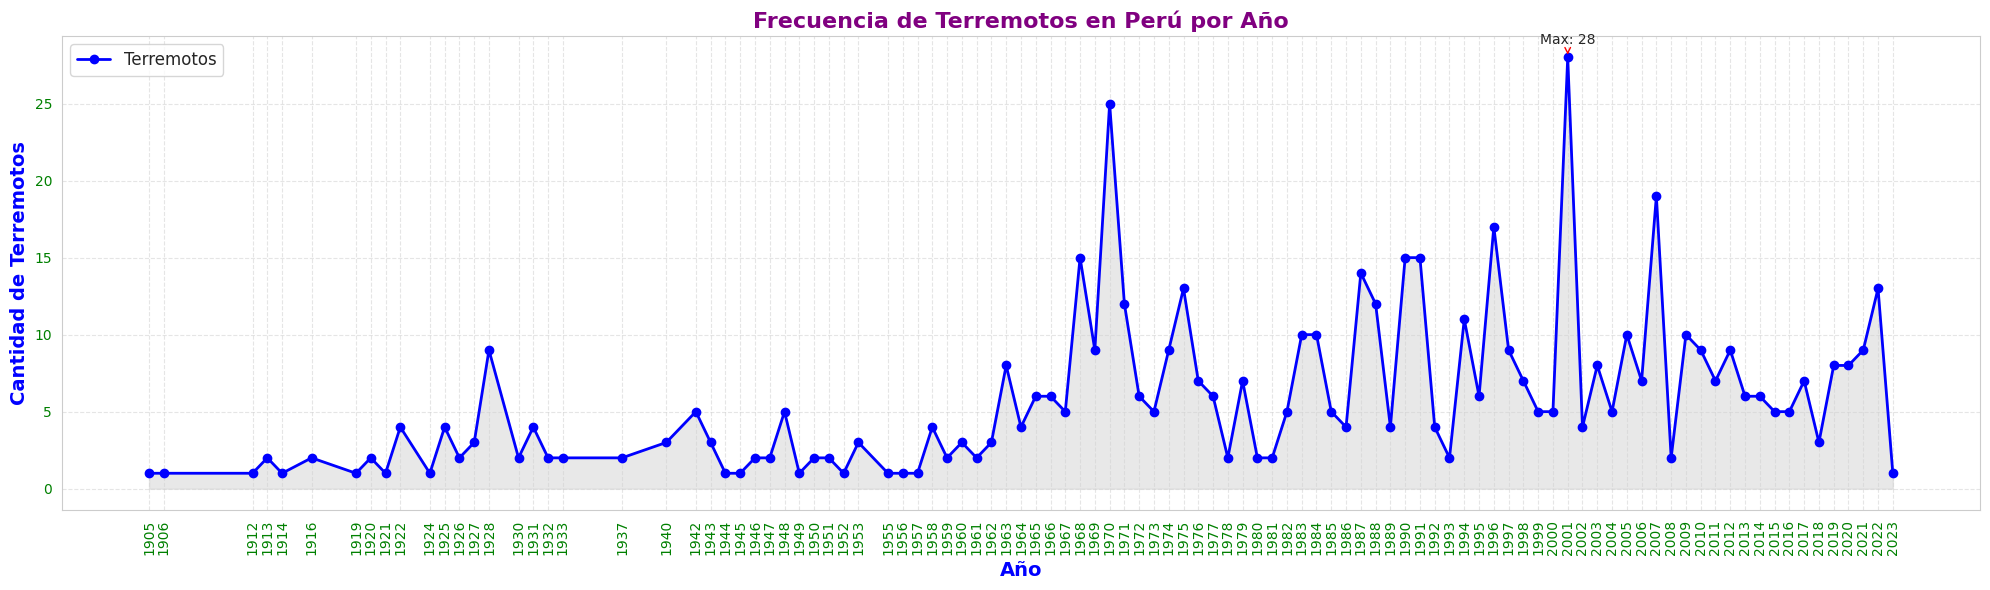

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el DataFrame desde un archivo CSV
df = pd.read_csv('./data/data.csv')

# Filtrar los terremotos relacionados con el país Perú y crear una copia del DataFrame
df_peru = df[df['Country'] == 'Peru'].copy()

# Convertir la columna de fechas en formato datetime usando .to_datetime()
df_peru['Date'] = pd.to_datetime(df_peru['Date'])

# Agrupar por año y contar la cantidad de terremotos por año
terremotos_por_año = df_peru.groupby(df_peru['Date'].dt.year)['ID'].count()

# Crear el gráfico de serie temporal
plt.figure(figsize=(20, 6))  # Ajustar el tamaño de la figura

# Personalizar el estilo de la línea, el grosor y el color de la serie temporal
plt.plot(terremotos_por_año.index, terremotos_por_año.values, color='blue', linewidth=2, marker='o', markersize=6, label='Terremotos')

# Personalizar el título y las etiquetas de los ejes
plt.title('Frecuencia de Terremotos en Perú por Año', fontsize=16, fontweight='bold', color='purple')
plt.xlabel('Año', fontsize=14, fontweight='bold', color='blue')
plt.ylabel('Cantidad de Terremotos', fontsize=14, fontweight='bold', color='blue')

# Añadir una cuadrícula de fondo
plt.grid(True, linestyle='--', alpha=0.5)

# Añadir descripciones de los valores en los puntos más altos
for index, value in terremotos_por_año.items():
    if value == terremotos_por_año.max():
        plt.annotate(f'Max: {value}', xy=(index, value), xytext=(-20, 10), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'))

# Ajustar los márgenes y el espaciado entre los ticks del eje x
plt.xticks(terremotos_por_año.index, rotation=90, fontsize=10, color='green')

# Ajustar el tamaño y el color de las etiquetas del eje y
plt.yticks(fontsize=10, color='green')

# Mostrar la leyenda
plt.legend(loc='upper left', fontsize=12)

# Añadir un fondo de color al gráfico
plt.fill_between(terremotos_por_año.index, terremotos_por_año.values, color='lightgray', alpha=0.5)

# Ajustar el espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()

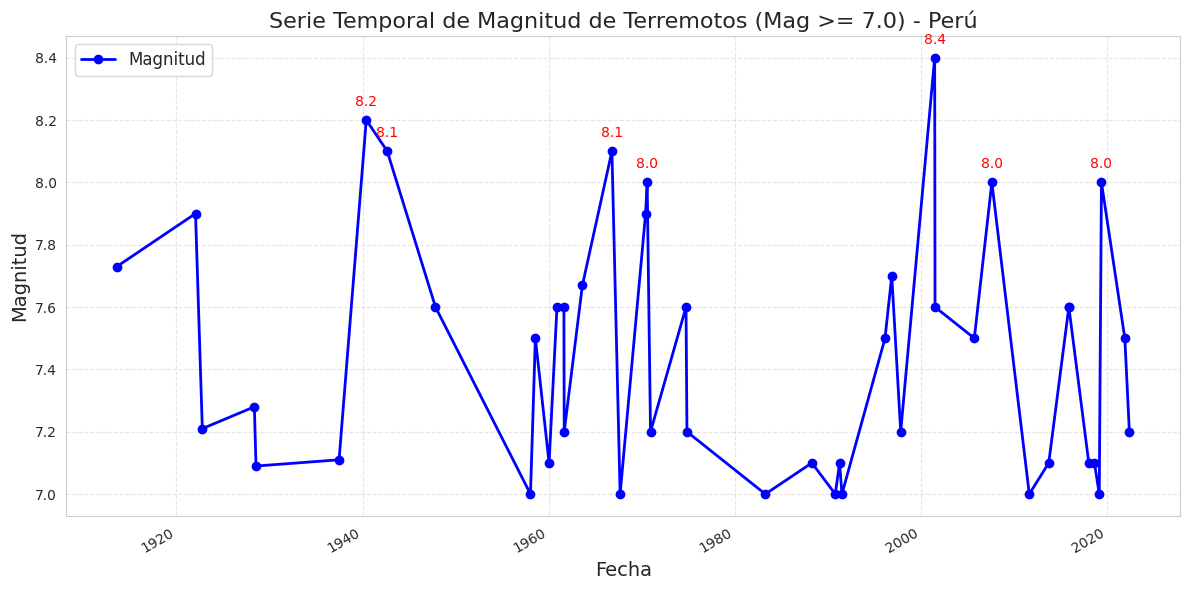

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Cargar el DataFrame desde un archivo CSV
df = pd.read_csv('./data/data.csv')

# Convertir la columna 'Date' a formato de fecha
df['Date'] = pd.to_datetime(df['Date'])

# Filtrar los terremotos con magnitud >= 7.0 y país igual a "Peru"
df = df[(df['Mag'] >= 7.0) & (df['Country'] == 'Peru')]

# Ordenar el DataFrame por la columna 'Date' en orden ascendente
df = df.sort_values('Date')

# Crear el gráfico de serie temporal
fig, ax = plt.subplots(figsize=(12, 6))

# Personalizar el estilo de la línea y el color
plt.plot(df['Date'], df['Mag'], color='blue', linewidth=2, marker='o', markersize=6, label='Magnitud')

# Personalizar el título y las etiquetas de los ejes
plt.title('Serie Temporal de Magnitud de Terremotos (Mag >= 7.0) - Perú', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Magnitud', fontsize=14)

# Añadir descripciones de los valores solo para magnitudes >= 8.0
for index, row in df.iterrows():
    if row['Mag'] >= 8.0:
        ax.annotate(f'{row["Mag"]:.1f}', (row['Date'], row['Mag']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='red')

# Configurar el formateador de fechas en el eje x para mostrar solo el año
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Ajustar los márgenes y el espaciado entre los ticks del eje x
fig.autofmt_xdate()

# Agregar una cuadrícula de fondo
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar la leyenda
plt.legend(loc='upper left', fontsize=12)

# Ajustar el espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## **Gráfico de cajas y bigotes**

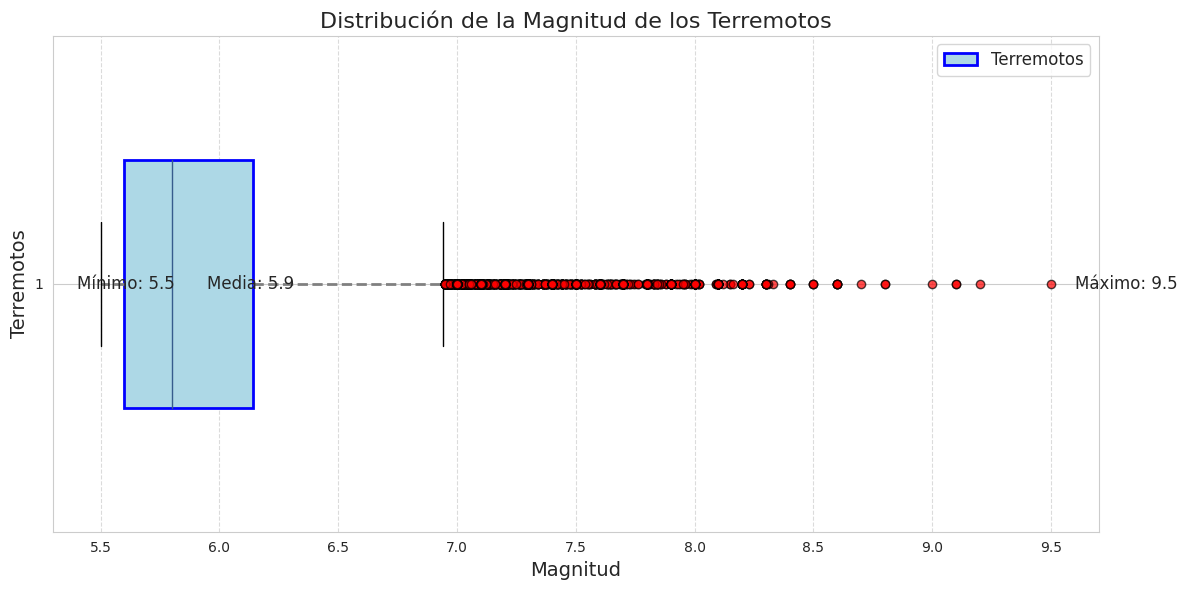

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el DataFrame desde un archivo CSV
df = pd.read_csv('./data/data.csv')

# Crear el gráfico de cajas y bigotes
plt.figure(figsize=(12, 6))

# Personalizar el estilo del gráfico de cajas y bigotes
bp = plt.boxplot(df['Mag'], vert=False, widths=0.5, showfliers=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Personalizar el título y las etiquetas de los ejes
plt.title('Distribución de la Magnitud de los Terremotos', fontsize=16)
plt.xlabel('Magnitud', fontsize=14)
plt.ylabel('Terremotos', fontsize=14)

# Añadir una cuadrícula de fondo
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir descripciones de los valores
max_mag = df['Mag'].max()
min_mag = df['Mag'].min()
mean_mag = df['Mag'].mean()

plt.text(max_mag + 0.1, 1, f'Máximo: {max_mag:.1f}', verticalalignment='center', fontsize=12)
plt.text(min_mag - 0.1, 1, f'Mínimo: {min_mag:.1f}', verticalalignment='center', fontsize=12)
plt.text(mean_mag, 1, f'Media: {mean_mag:.1f}', verticalalignment='center', fontsize=12)

# Personalizar los colores de los elementos del gráfico
for box in bp['boxes']:
    box.set(color='blue', linewidth=2)
    box.set(facecolor='lightblue')

for whisker in bp['whiskers']:
    whisker.set(color='gray', linestyle='--', linewidth=2)

for flier in bp['fliers']:
    flier.set(marker='o', markersize=6, markerfacecolor='red', alpha=0.7)

# Añadir leyenda
plt.legend(['Terremotos'], loc='upper right', fontsize=12)

# Ajustar el espaciado
plt.tight_layout()

plt.show()

 **Algunas conclusiones que se pueden extraer de este gráfico son:**

* El rango de magnitudes de los terremotos está representado por la longitud de la caja, donde la parte inferior de la caja representa el percentil 25 `(Q1)` y la parte superior de la caja representa el percentil 75 `(Q3)`. La línea en el medio de la caja representa la mediana (percentil 50).
* Los bigotes verticalmente extendidos representan el rango intercuartil `(IQR)`, que abarca la mayoría de los datos. Los valores fuera de los bigotes se consideran atípicos y se muestran como puntos individuales.
* La caja tiene un color azul claro para resaltar visualmente el área de distribución.
* En este gráfico, se puede observar la dispersión de las magnitudes de los terremotos, así como la presencia de valores atípicos. La descripción de los valores máximos, mínimos y promedio proporciona información adicional sobre los extremos y la tendencia central de los datos.

En resumen, el gráfico de cajas y bigotes proporciona una representación visual de la distribución de la magnitud de los terremotos, permitiendo identificar los valores atípicos y obtener una visión general de la variabilidad de las magnitudes en el conjunto de datos.

## **Gráfico de cajas y bigotes del Peru**

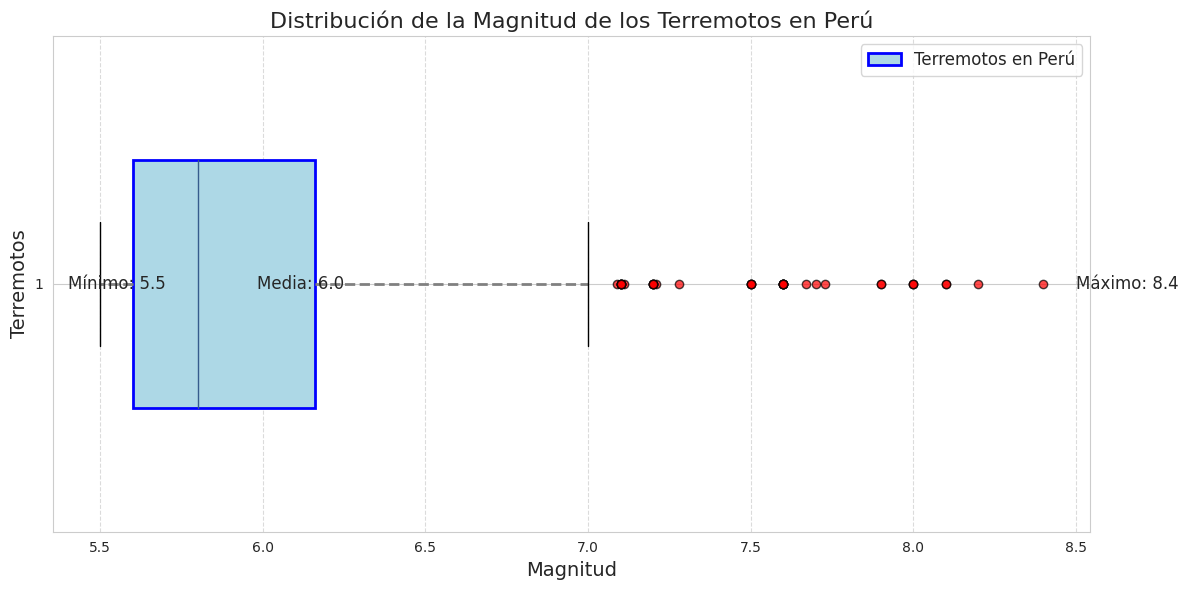

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el DataFrame desde un archivo CSV
df = pd.read_csv('./data/data.csv')

# Filtrar los terremotos relacionados con el país Perú
df_peru = df[df['Country'] == 'Peru']

# Crear el gráfico de cajas y bigotes
plt.figure(figsize=(12, 6))

# Personalizar el estilo del gráfico de cajas y bigotes
bp = plt.boxplot(df_peru['Mag'], vert=False, widths=0.5, showfliers=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Personalizar el título y las etiquetas de los ejes
plt.title('Distribución de la Magnitud de los Terremotos en Perú', fontsize=16)
plt.xlabel('Magnitud', fontsize=14)
plt.ylabel('Terremotos', fontsize=14)

# Añadir una cuadrícula de fondo
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir descripciones de los valores
max_mag = df_peru['Mag'].max()
min_mag = df_peru['Mag'].min()
mean_mag = df_peru['Mag'].mean()

plt.text(max_mag + 0.1, 1, f'Máximo: {max_mag:.1f}', verticalalignment='center', fontsize=12)
plt.text(min_mag - 0.1, 1, f'Mínimo: {min_mag:.1f}', verticalalignment='center', fontsize=12)
plt.text(mean_mag, 1, f'Media: {mean_mag:.1f}', verticalalignment='center', fontsize=12)

# Personalizar los colores de los elementos del gráfico
for box in bp['boxes']:
    box.set(color='blue', linewidth=2)
    box.set(facecolor='lightblue')

for whisker in bp['whiskers']:
    whisker.set(color='gray', linestyle='--', linewidth=2)

for flier in bp['fliers']:
    flier.set(marker='o', markersize=6, markerfacecolor='red', alpha=0.7)

# Añadir leyenda
plt.legend(['Terremotos en Perú'], loc='upper right', fontsize=12)

# Ajustar el espaciado
plt.tight_layout()

plt.show()

### **Gráfico de densidad de frecuencia**

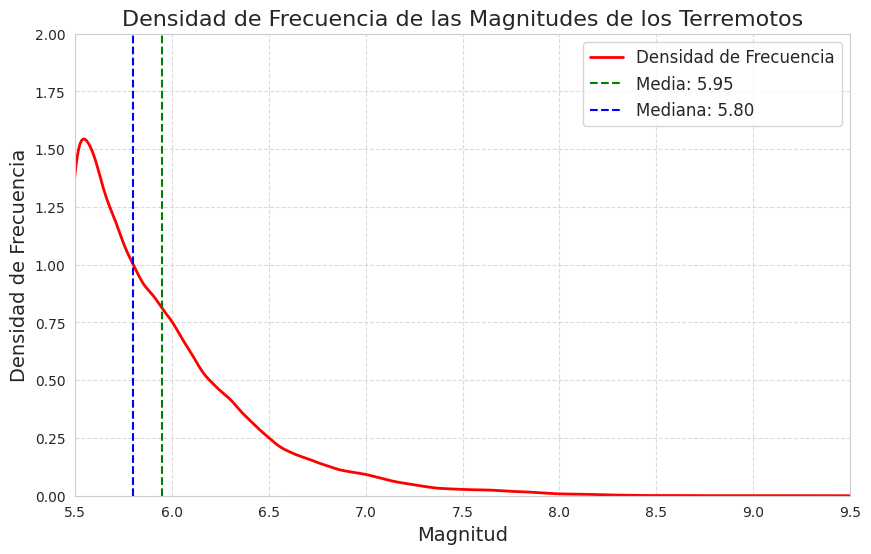

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el DataFrame desde un archivo CSV
df = pd.read_csv('./data/data.csv')

# Seleccionar la columna de magnitudes de los terremotos
magnitudes = df['Mag']

# Calcular la media y mediana de las magnitudes de los terremotos
media = magnitudes.mean()
mediana = magnitudes.median()

# Crear el gráfico de densidad de frecuencia
plt.figure(figsize=(10, 6))
density = magnitudes.plot.kde(color='red', linewidth=2, label='Densidad de Frecuencia')

# Agregar líneas verticales para indicar la media y mediana
plt.axvline(x=media, color='green', linestyle='--', label='Media: {:.2f}'.format(media))
plt.axvline(x=mediana, color='blue', linestyle='--', label='Mediana: {:.2f}'.format(mediana))

# Personalizar el gráfico
plt.title('Densidad de Frecuencia de las Magnitudes de los Terremotos', fontsize=16)
plt.xlabel('Magnitud', fontsize=14)
plt.ylabel('Densidad de Frecuencia', fontsize=14)
plt.ylim(0, 2)  # Ajustar el rango del eje y para una mejor visualización
plt.xlim(5.5, 9.5)  # Ajustar el rango del eje x
plt.legend(loc='upper right', fontsize=12)

# Añadir una cuadrícula de fondo
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.show()

 **Algunas conclusiones que se pueden extraer de este gráfico son:**

* El gráfico de densidad de frecuencia de las magnitudes de los terremotos muestra la distribución de las magnitudes en función de la densidad de frecuencia. La línea roja representa la estimación de la función de densidad de probabilidad.

* En este gráfico, se han agregado líneas verticales para indicar la media (en verde) y la mediana (en azul) de las magnitudes de los terremotos. La media representa el valor promedio de las magnitudes, mientras que la mediana representa el valor que divide al conjunto de datos en dos partes iguales, es decir, el valor que se encuentra en el medio.

* Observando el gráfico, se puede notar que la distribución de las magnitudes de los terremotos tiende a ser asimétrica hacia la derecha, lo que indica que hay una mayor concentración de terremotos con magnitudes más bajas y algunos valores atípicos con magnitudes más altas.

En resumen, este gráfico proporciona una representación visual de la distribución de las magnitudes de los terremotos, destacando la media y la mediana como medidas resumidas. Esto puede ayudar a comprender la frecuencia y la distribución de los terremotos en función de su magnitud.

### **Gráfico de densidad de frecuencia del Peru**

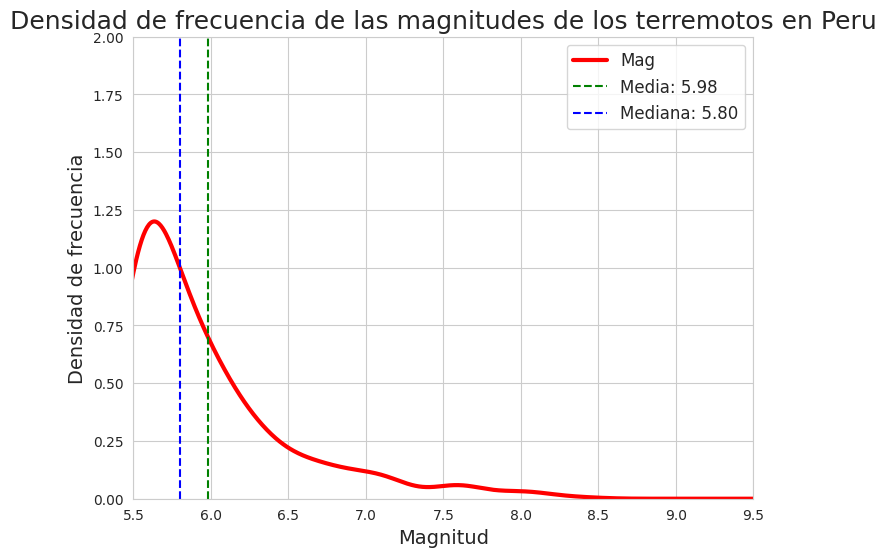

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

#Cargar el DataFrame desde un archivo CSV
df = pd.read_csv('./data/data.csv')

#Filtrar los terremotos relacionados con el país Peru
df_peru = df[df['Country'] == 'Peru']

#Seleccionar la columna de magnitudes de los terremotos en Peru
magnitudes_peru = df_peru['Mag']

#Calcular la media y mediana de las magnitudes de los terremotos en Peru
media_peru = magnitudes_peru.mean()
mediana_peru = magnitudes_peru.median()

#Crear el gráfico de densidad de frecuencia para los terremotos en Peru
plt.figure(figsize=(8, 6))
magnitudes_peru.plot.kde(linewidth=3, color='red')

#Agregar líneas verticales para indicar la media y mediana en Peru
plt.axvline(x=media_peru, color='green', linestyle='--', label='Media: {:.2f}'.format(media_peru))
plt.axvline(x=mediana_peru, color='blue', linestyle='--', label='Mediana: {:.2f}'.format(mediana_peru))

#Personalizar el gráfico
plt.title('Densidad de frecuencia de las magnitudes de los terremotos en Peru', fontsize=18)
plt.xlabel('Magnitud', fontsize=14)
plt.ylabel('Densidad de frecuencia', fontsize=14)
plt.ylim(0, 2)
plt.xlim(5.50, 9.50)
plt.legend(loc='upper right', fontsize=12)

plt.show()

### **Gráfico de probabilidad acumulada**

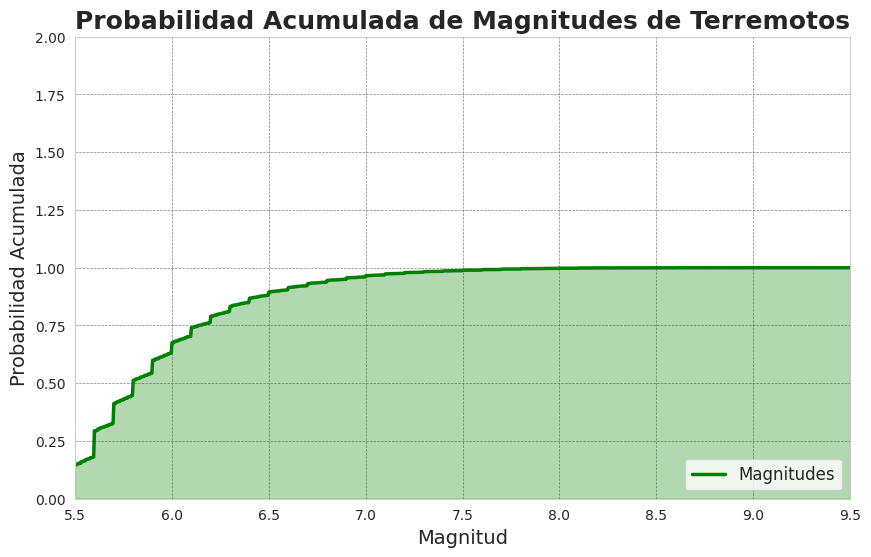

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Cargar el DataFrame desde un archivo CSV
df = pd.read_csv('./data/data.csv')

# Seleccionar la columna de magnitudes de los terremotos
magnitudes = df['Mag']

# Calcular la probabilidad acumulada de las magnitudes de los terremotos
ecdf = sm.distributions.ECDF(magnitudes)
x = np.linspace(min(magnitudes), max(magnitudes), num=1000)
y = ecdf(x)

# Crear el gráfico de probabilidad acumulada
plt.figure(figsize=(10, 6))

# Personalizar el aspecto del gráfico
plt.plot(x, y, color='green', linewidth=2.5, label='Magnitudes')
plt.fill_between(x, y, alpha=0.3, color='green')  # Rellenar el área bajo la curva

# Personalizar el título y las etiquetas de los ejes
plt.title('Probabilidad Acumulada de Magnitudes de Terremotos', fontsize=18, fontweight='bold')
plt.xlabel('Magnitud', fontsize=14)
plt.ylabel('Probabilidad Acumulada', fontsize=14)

# Personalizar los límites de los ejes
plt.xlim(5.5, 9.5)
plt.ylim(0, 2)

# Agregar una cuadrícula de fondo
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Añadir una leyenda
plt.legend(loc='lower right', fontsize=12)

plt.show()

En el gráfico de probabilidad acumulada de magnitudes de terremotos, se puede observar la distribución acumulada de las magnitudes en función de su probabilidad.

**Al analizar el gráfico, se puede concluir lo siguiente:**

* La mayoría de los terremotos tienen magnitudes inferiores a 9.0, ya que la curva de probabilidad acumulada se acerca a 1 en ese rango.
* La probabilidad acumulada aumenta gradualmente a medida que las magnitudes aumentan, lo que indica que los terremotos de mayor magnitud son menos frecuentes.
* Existe una mayor concentración de terremotos en el rango de magnitudes alrededor de 6.0 a 7.0, ya que la curva muestra una pendiente más pronunciada en esa región.

En resumen, el gráfico de probabilidad acumulada proporciona una visión general de la distribución de magnitudes de terremotos y resalta la frecuencia relativa de terremotos en diferentes rangos de magnitud.

### **Gráfico de probabilidad acumulada del Peru**

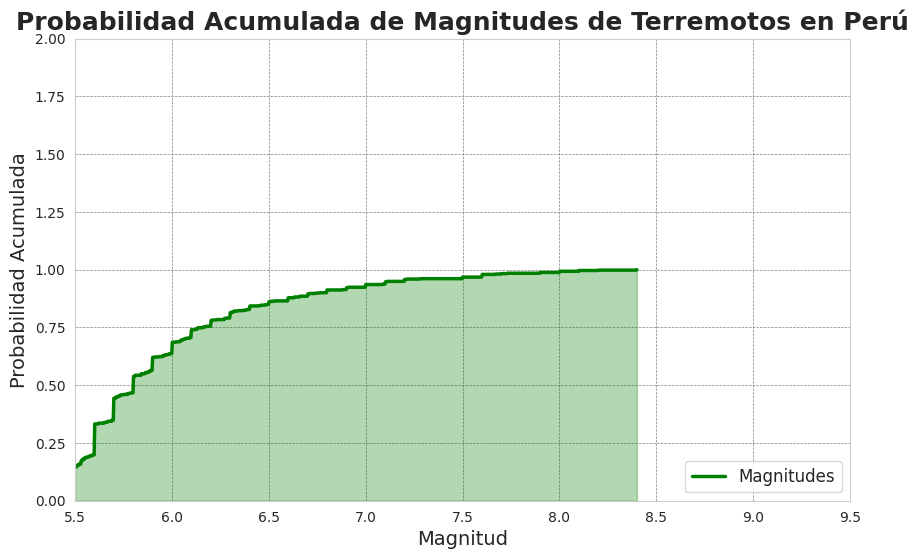

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Cargar el DataFrame desde un archivo CSV
df = pd.read_csv('./data/data.csv')

# Filtrar los terremotos del país Perú
df_peru = df[df['Country'] == 'Peru']

# Seleccionar la columna de magnitudes de los terremotos en Perú
magnitudes = df_peru['Mag']

# Calcular la probabilidad acumulada de las magnitudes de los terremotos en Perú
ecdf = sm.distributions.ECDF(magnitudes)
x = np.linspace(min(magnitudes), max(magnitudes), num=1000)
y = ecdf(x)

# Crear el gráfico de probabilidad acumulada
plt.figure(figsize=(10, 6))

# Personalizar el aspecto del gráfico
plt.plot(x, y, color='green', linewidth=2.5, label='Magnitudes')
plt.fill_between(x, y, alpha=0.3, color='green')  # Rellenar el área bajo la curva

# Personalizar el título y las etiquetas de los ejes
plt.title('Probabilidad Acumulada de Magnitudes de Terremotos en Perú', fontsize=18, fontweight='bold')
plt.xlabel('Magnitud', fontsize=14)
plt.ylabel('Probabilidad Acumulada', fontsize=14)

# Personalizar los límites de los ejes
plt.xlim(5.5, 9.5)
plt.ylim(0, 2)

# Agregar una cuadrícula de fondo
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Añadir una leyenda
plt.legend(loc='lower right', fontsize=12)

plt.show()

### **Gráfico circular (Pie chart)**

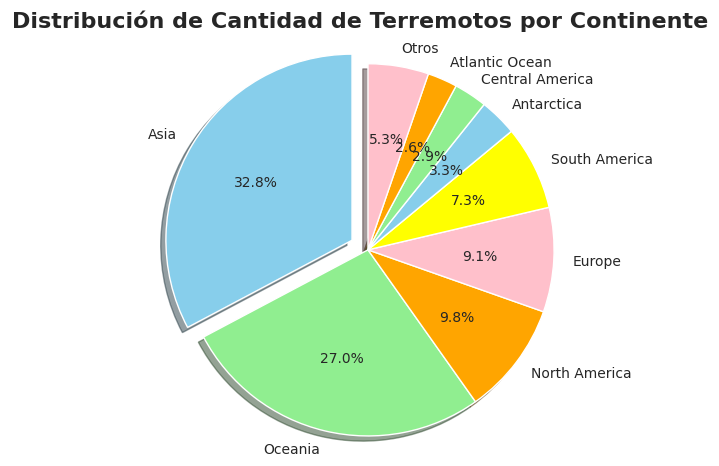

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el DataFrame desde un archivo CSV
df = pd.read_csv('./data/data.csv')

# Contar la cantidad de terremotos por continente
type_counts = df['Continent'].value_counts()

# Colores personalizados
colors = ['skyblue', 'lightgreen', 'orange', 'pink', 'yellow']

# Ajustar la longitud de explode
explode = [0.1] + [0] * (len(type_counts) - 1)

# Agrupar los continentes con un porcentaje menor al 2% en una categoría "Otros"
threshold = 0.02
small_categories = type_counts[type_counts / type_counts.sum() < threshold]
type_counts['Otros'] = small_categories.sum()
type_counts = type_counts.drop(small_categories.index)

# Actualizar los colores y el explode
colors = colors[:len(type_counts)]
explode = [0.1] + [0] * (len(type_counts) - 1)

plt.figure(figsize=(10, 6))

# Crear el gráfico de pastel
plt.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', colors=colors, explode=explode, startangle=90, shadow=True)

# Personalizar el título y el tamaño del gráfico
plt.title('Distribución de Cantidad de Terremotos por Continente', fontsize=16, fontweight='bold')

# Hacer que el gráfico sea un círculo perfecto
plt.axis('equal')

# Ajustar el tamaño del gráfico y el espaciado entre las partes
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.8, top=0.8)

plt.show()

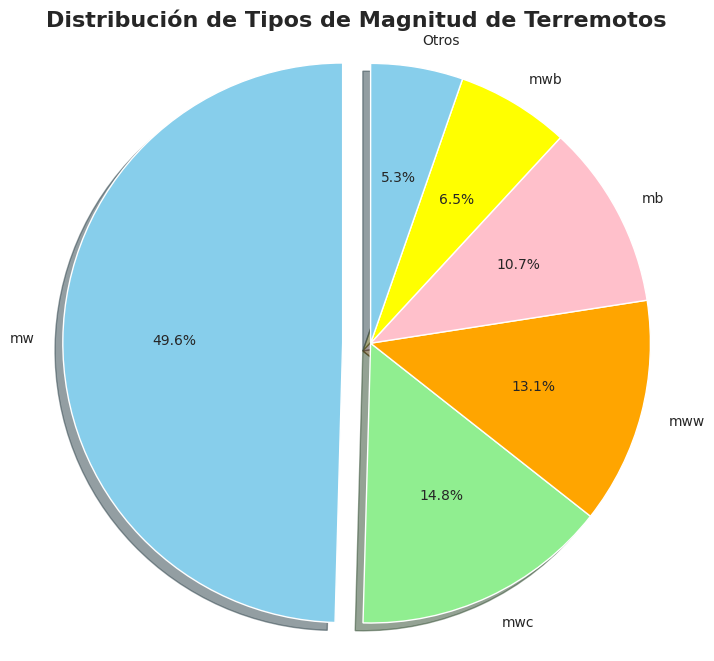

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el DataFrame desde un archivo CSV
df = pd.read_csv('./data/data.csv')

# Contar la cantidad de terremotos por tipo de magnitud
magtype_counts = df['MagType'].value_counts()

# Colores personalizados
colors = ['skyblue', 'lightgreen', 'orange', 'pink', 'yellow']

# Ajustar la longitud de explode
explode = [0.1] + [0] * (len(magtype_counts) - 1)

# Agrupar los tipos de magnitud con un porcentaje menor al 5% en una categoría "Otros"
threshold = 0.05
small_categories = magtype_counts[magtype_counts / magtype_counts.sum() < threshold]
magtype_counts['Otros'] = small_categories.sum()
magtype_counts = magtype_counts.drop(small_categories.index)

# Actualizar los colores y el explode
colors = colors[:len(magtype_counts)]
explode = [0.1] + [0] * (len(magtype_counts) - 1)

plt.figure(figsize=(8, 8))  # Tamaño de la figura

# Crear el gráfico de pastel
plt.pie(magtype_counts.values, labels=magtype_counts.index, autopct='%1.1f%%', colors=colors, explode=explode, startangle=90, shadow=True)

# Personalizar el título y el tamaño del gráfico
plt.title('Distribución de Tipos de Magnitud de Terremotos', fontsize=16, fontweight='bold')

# Hacer que el gráfico sea un círculo perfecto
plt.axis('equal')

plt.show()

## **Mapas**

### **Mapa de calor de ubicaciones**

In [50]:
import folium
from folium.plugins import HeatMap
import pandas as pd
from IPython.display import display

# Cargar el DataFrame desde un archivo CSV
df = pd.read_csv('./data/data.csv')

# Establecer la columna "ID" como índice
df = df.set_index('ID')

# Crear un mapa centrado en una ubicación específica y ajustar el nivel de zoom
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=3)

# Crear un mapa de calor con las ubicaciones de los terremotos y personalizar la paleta de colores
heat_data = [[row['Latitude'], row['Longitude']] for index, row in df.iterrows()]
gradient = {0.4: 'blue', 0.6: 'lime', 0.8: 'orange', 1: 'red'}
HeatMap(heat_data, gradient=gradient, min_opacity=0.2, radius=15, blur=10).add_to(m)

# Obtener el top 20 de los terremotos más fuertes
top_20 = df.nlargest(20, 'Mag')

# Personalizar el marcador para los 20 terremotos más fuertes
for index, row in top_20.iterrows():
    html = f"""
        <div style='font-family: Arial, sans-serif;'>
            <h4 style='margin: 0;'><b>{row['Country']}</b></h4>
            <p style='margin: 0; font-size: 14px;'>
            <b>Magnitud:</b> {row['Mag']} Mw
            <br/>
            <b>Profundidad:</b> {row['Depth']} Km
            <br/>
            <b>Lugar:</b> {row['Place']}</p>
        </div>
    """
    popup = folium.Popup(html, max_width=300)
    folium.Marker(location=[row['Latitude'], row['Longitude']],
                  popup=popup,
                  icon=folium.Icon(icon='info-sign', color='red')).add_to(m)

# Personalizar el diseño y las descripciones
folium.TileLayer('cartodbpositron').add_to(m)  # Fondo claro para mejorar la visibilidad de los puntos
m.get_root().header.add_child(folium.Element("<h1 style='text-align: center;'>Mapa de Calor de Terremotos</h1>"))
m.add_child(folium.LatLngPopup())  # Mostrar las coordenadas al hacer clic en el mapa
m.add_child(folium.LayerControl(position='topright', collapsed=False))  # Mostrar la leyenda

# Mostrar el mapa
display(m)

 **Algunas conclusiones clave que se pueden extraer son las siguientes:**

* **Distribución geográfica:** El mapa resalta las áreas con mayor actividad sísmica en función de la intensidad del color. Las zonas con colores más intensos representan áreas con una mayor concentración de terremotos.

* **Patrones regionales:** Pueden observarse patrones regionales de actividad sísmica. Por ejemplo, es posible identificar áreas donde se concentran terremotos de mayor magnitud o donde la frecuencia de los eventos sísmicos es más alta.

* **Terremotos destacados:** Mediante los marcadores y las ventanas emergentes en el mapa, se muestran los detalles de los terremotos más fuertes. Estos eventos están representados por marcadores rojos y muestran información como la magnitud, la profundidad y la fecha del terremoto.

* **Relación entre ubicación y magnitud:** El mapa puede revelar patrones interesantes sobre la relación entre la ubicación geográfica y la magnitud de los terremotos. Es posible observar si hay áreas propensas a terremotos de mayor magnitud y si existen correlaciones espaciales entre la ubicación y la intensidad sísmica.

En general, el mapa de calor proporciona una visualización efectiva de la distribución de terremotos y puede ayudar a comprender mejor la actividad sísmica en diferentes regiones. Sin embargo, es importante considerar que este análisis se basa en los datos disponibles y no representa necesariamente la totalidad de los terremotos ocurridos en el mundo.

### **Mapa de calor de ubicaciones del Peru**

In [51]:
import folium
from folium.plugins import HeatMap
import pandas as pd
from IPython.display import display

# Cargar el DataFrame desde un archivo CSV
df = pd.read_csv('./data/data.csv')

# Filtrar los datos por país
df_peru = df[df['Country'] == 'Peru']

# Crear un mapa centrado en Perú y ajustar el nivel de zoom
m = folium.Map(location=[-9.19, -75.015], zoom_start=5, scrollWheelZoom=False)

# Crear un mapa de calor con las ubicaciones de los terremotos y personalizar la paleta de colores
heat_data = [[row['Latitude'], row['Longitude']] for index, row in df_peru.iterrows()]
gradient = {0.4: 'blue', 0.6: 'lime', 0.8: 'orange', 1: 'red'}
HeatMap(heat_data, gradient=gradient, min_opacity=0.2, radius=15, blur=10).add_to(m)

# Obtener el top 20 de los terremotos más fuertes en Perú
top_20 = df_peru.nlargest(20, 'Mag')

# Personalizar el marcador para los 20 terremotos más fuertes en Perú
for index, row in top_20.iterrows():
    html = f"""
        <div style='font-family: Arial, sans-serif;'>
            <h4 style='margin: 0;'><b>{row['Country']}</b></h4>
            <p style='margin: 0; font-size: 14px;'>
            <b>Magnitud:</b> {row['Mag']} Mw
            <br/>
            <b>Profundidad:</b> {row['Depth']} Km
            <br/>
            <b>Fecha:</b> {row['Date']}
            <br/>
            <b>Lugar:</b> {row['Place']}</p>
        </div>
    """
    popup = folium.Popup(html, max_width=300)
    folium.Marker(location=[row['Latitude'], row['Longitude']],
                  popup=popup,
                  icon=folium.Icon(icon='info-sign', color='red')).add_to(m)

# Personalizar el diseño y las descripciones
folium.TileLayer('cartodbpositron').add_to(m)  # Fondo claro para mejorar la visibilidad de los puntos
m.get_root().header.add_child(folium.Element("<h1 style='text-align: center;'>Mapa de Calor de Terremotos en Perú</h1>"))
m.add_child(folium.LatLngPopup())  # Mostrar las coordenadas al hacer clic en el mapa
m.add_child(folium.LayerControl(position='topright', collapsed=False))  # Mostrar la leyenda

# Mostrar el mapa
display(m)

### **Mapa de puntos (Point map)**

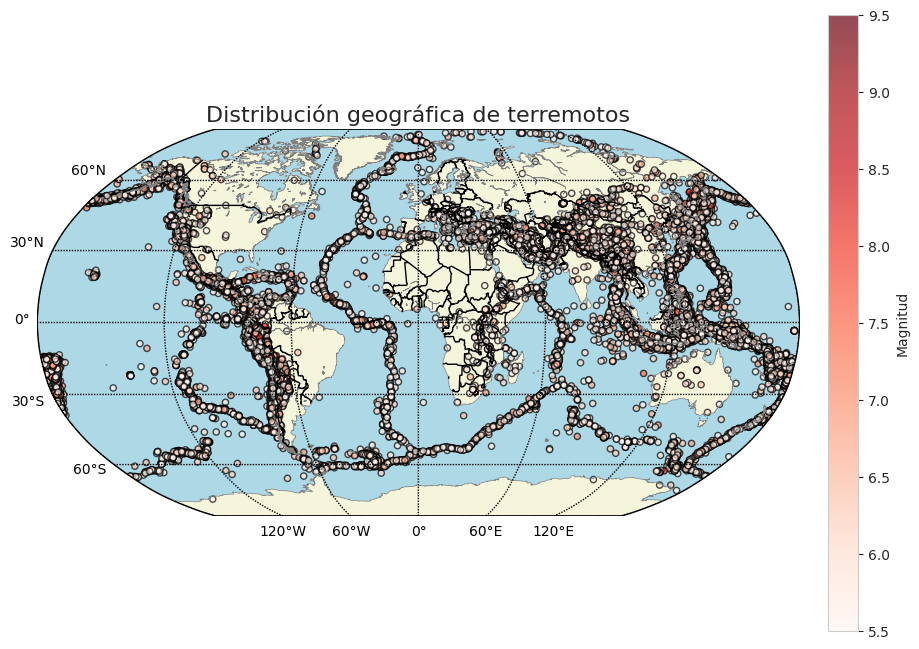

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Cargar el DataFrame de terremotos
df = pd.read_csv('./data/data.csv')

# Crear una figura y un objeto de mapa
plt.figure(figsize=(12, 8))
m = Basemap(projection='robin', lon_0=0, resolution='l')

# Convertir las coordenadas de latitud y longitud en coordenadas del mapa
x, y = m(df['Longitude'].values, df['Latitude'].values)

# Dibujar los puntos en el mapa, resaltando los terremotos más fuertes
m.scatter(x, y, s=20, c=df['Mag'], cmap='Reds', alpha=0.7, edgecolor='k')

# Configurar los límites y etiquetas del mapa
m.drawcoastlines(linewidth=0.5, color='gray')
m.drawcountries(linewidth=1, color='black')
m.drawmapboundary(fill_color='lightblue', linewidth=0)
m.fillcontinents(color='beige', lake_color='lightblue', zorder=0)
m.drawparallels(range(-90, 91, 30), labels=[1, 0, 0, 0])
m.drawmeridians(range(-180, 181, 60), labels=[0, 0, 0, 1])

# Agregar título y leyenda al mapa
plt.title('Distribución geográfica de terremotos', fontsize=16)
plt.colorbar(label='Magnitud', orientation='vertical', pad=0.03)
plt.clim(df['Mag'].min(), df['Mag'].max())  # Establecer el rango de colores

# Mostrar el mapa
plt.show()

 **Algunas conclusiones clave que se pueden extraer son las siguientes:**

El mapa muestra la distribución geográfica de los terremotos registrados en el conjunto de datos. Los puntos en el mapa representan la ubicación de los terremotos, y su color refleja la magnitud de cada evento. Los terremotos más fuertes se resaltan con colores más intensos.

A partir del mapa, se puede observar que los terremotos están distribuidos en diferentes regiones del mundo, con una concentración particular en áreas de actividad sísmica significativa, como la región del Cinturón de Fuego del Pacífico. La visualización nos brinda una visión general de la distribución espacial de los terremotos y nos permite identificar áreas con mayor actividad sísmica.

Es importante tener en cuenta que el mapa no muestra todos los terremotos registrados, ya que se utiliza una muestra del conjunto de datos. Sin embargo, proporciona una representación visual útil de la distribución geográfica general de los terremotos.

### **Mapa de ubicación de terremotos**

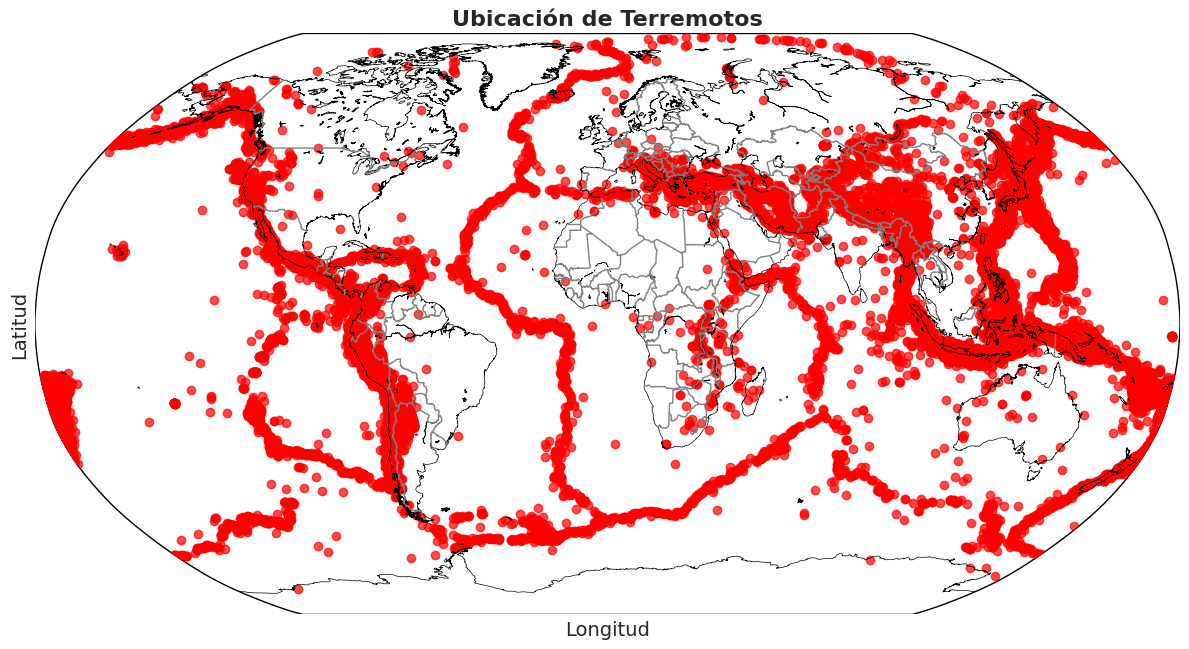

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Cargar el DataFrame de terremotos
df = pd.read_csv('./data/data.csv')

# Extraer las columnas de latitud y longitud
latitudes = df['Latitude']
longitudes = df['Longitude']

# Configurar el mapa
fig = plt.figure(figsize=(12, 8))
m = Basemap(projection='robin', lon_0=0, resolution='l')

# Dibujar costas y fronteras del mapa mundial
m.drawcoastlines(linewidth=0.5, color='black')  # Cambié el color a lightgray para una apariencia más suave
m.drawcountries(linewidth=1, color='gray')  # Cambié el color a gray para una apariencia más suave

# Convertir las coordenadas de latitud y longitud a coordenadas del mapa
x, y = m(longitudes, latitudes)

# Dibujar puntos en el mapa
m.scatter(x, y, marker='o', color='red', alpha=0.7)

# Agregar título al mapa
plt.title('Ubicación de Terremotos', fontsize=16, fontweight='bold')

# Personalizar las etiquetas de los ejes
plt.xlabel('Longitud', fontsize=14)
plt.ylabel('Latitud', fontsize=14)

# Ajustar el tamaño del gráfico y el espaciado
plt.tight_layout()

# Mostrar el mapa
plt.show()


 **Algunas conclusiones clave que se pueden extraer son las siguientes:**

El mapa muestra la ubicación de los terremotos registrados en el conjunto de datos. Los puntos rojos representan los terremotos y su distribución geográfica en todo el mundo. Se puede observar que los terremotos están dispersos en diversas regiones, con una concentración particular en ciertas áreas. Este mapa brinda una visión general de la distribución espacial de los terremotos y puede ayudar a identificar patrones geográficos. Es importante tener en cuenta que la escala de los puntos no representa la magnitud o la intensidad de los terremotos, sino su ubicación geográfica.

### **Mapa de distribución de terremotos por país o continente**

/tmp/ipykernel_1465/1880315707.py:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


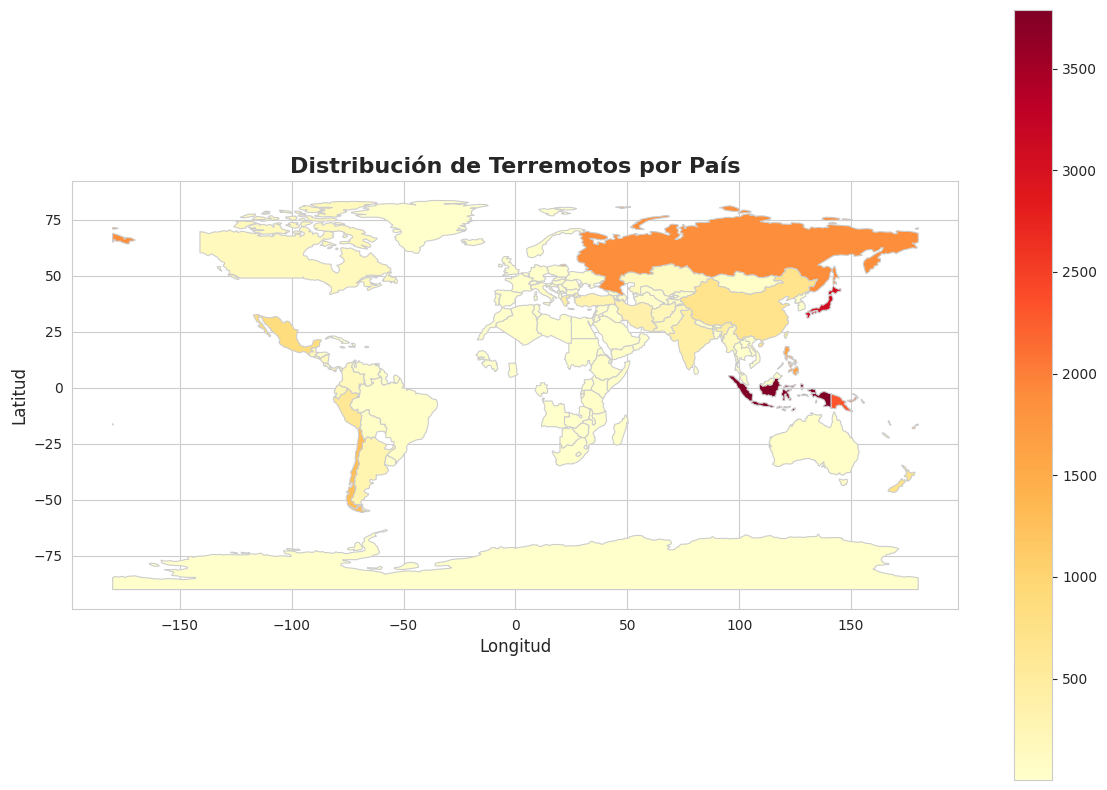

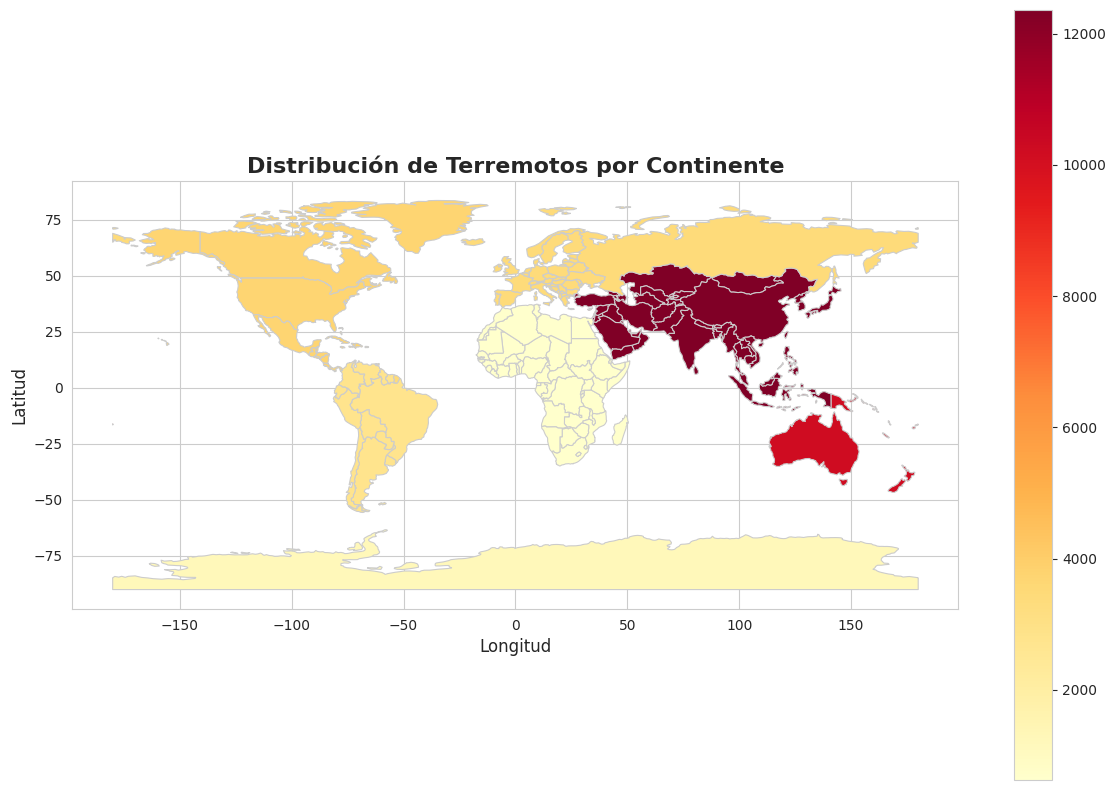

In [56]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar los datos en un DataFrame
df = pd.read_csv('./data/data.csv')

# Agrupar los datos por país y contar la cantidad de terremotos por país
terremotos_por_pais = df.groupby('Country').size().reset_index(name='Terremotos')

# Descargar los datos geográficos de países de Natural Earth
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Unir los datos geográficos con los datos de terremotos por país
mapa_paises = gdf.merge(terremotos_por_pais, left_on='name', right_on='Country')

# Crear una figura y ejes personalizados
fig, ax = plt.subplots(figsize=(12, 8))

# Visualizar el mapa de distribución de terremotos por país
mapa_paises.plot(column='Terremotos', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Personalizar el mapa de distribución de terremotos por país
ax.set_title('Distribución de Terremotos por País', fontsize=16, fontweight='bold')
ax.set_xlabel('Longitud', fontsize=12)
ax.set_ylabel('Latitud', fontsize=12)

# Ajustar el tamaño del gráfico y el espaciado
plt.tight_layout()

# Mostrar el mapa
plt.show()

# Agrupar los datos por continente y contar la cantidad de terremotos por continente
terremotos_por_continente = df.groupby('Continent').size().reset_index(name='Terremotos')

# Unir los datos geográficos con los datos de terremotos por continente
mapa_continentes = gdf.merge(terremotos_por_continente, left_on='continent', right_on='Continent')

# Crear una figura y ejes personalizados
fig, ax = plt.subplots(figsize=(12, 8))

# Visualizar el mapa de distribución de terremotos por continente
mapa_continentes.plot(column='Terremotos', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Personalizar el mapa de distribución de terremotos por continente
ax.set_title('Distribución de Terremotos por Continente', fontsize=16, fontweight='bold')
ax.set_xlabel('Longitud', fontsize=12)
ax.set_ylabel('Latitud', fontsize=12)

# Ajustar el tamaño del gráfico y el espaciado
plt.tight_layout()

# Mostrar el mapa
plt.show()

**partir de estos mapas, podemos obtener algunas conclusiones resumidas:**

* **Distribución de terremotos por país:**

 El mapa muestra la concentración de terremotos en diferentes países. Al observar los colores más oscuros en el mapa, podemos identificar los países con mayor actividad sísmica. Estos suelen ser aquellos ubicados en regiones tectónicamente activas, como Chile, Japón, Indonesia y México. Los países con colores más claros indican una menor actividad sísmica.

* **Distribución de terremotos por continente:**

 El mapa muestra la cantidad de terremotos agrupados por continente. Se puede observar que los continentes con una mayor cantidad de terremotos son América del Sur, América del Norte y Asia. Estas regiones están ubicadas en áreas donde convergen varias placas tectónicas, lo que aumenta la probabilidad de actividad sísmica.

En resumen, estos mapas nos permiten visualizar y comprender la distribución geográfica de los terremotos en todo el mundo. Nos ayudan a identificar las áreas con mayor actividad sísmica y los patrones tectónicos asociados. Estos conocimientos son útiles para la planificación de la mitigación de riesgos, el diseño de infraestructuras resilientes y la respuesta ante desastres naturales.